<a href="https://colab.research.google.com/github/jp-quevedo/data-science-1/blob/main/entrega_final_quevedo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importe de herramientas y carga de dataset

In [72]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

url = 'https://raw.githubusercontent.com/jp-quevedo/data-science-1/main/life-expectancy-data.csv'
df = pd.read_csv(url, sep = ',')
columns = df.columns

sns.set(style = "whitegrid")

df.head(16)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


## Preguntas e hipótesis de interés

#### Preguntas

- **¿Cómo ha evolucionado la esperanza de vida en diferentes países a lo largo
del tiempo?**
 - Relevancia: La columna 'Year' permite analizar la evolución temporal, mientras que 'Life expectancy' es directamente relevante para esta pregunta.
- **¿Existe alguna correlación entre el GDP (PIB) y la esperanza de vida?**
 - Relevancia: Las columnas 'GDP' y 'Life expectancy' son cruciales aquí.

#### Hipótesis


- **Un mayor gasto total en salud está asociado con una mayor esperanza de vida.**
 - Relevancia: Exploraremos la relación entre 'Total expenditure' y 'Life expectancy'.
- **La prevalencia de enfermedades prevenibles como la Hepatitis B afecta negativamente la esperanza de vida.**
 - Relevancia: Utilizaremos las columnas de enfermedades para analizar su impacto en la esperanza de vida.

## Gráficos relacionados a preguntas e hipótesis

#### 1.- Evolución de la esperanza de vida de Afganistán (2000 - 2015)

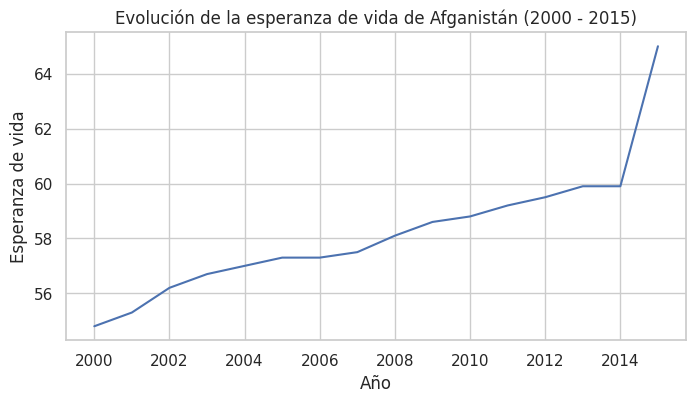

In [4]:
df['Year'] = df['Year'].astype(int)
df_2015 = df[df['Year'] == 2015]
# Graficaremos por país dado que al integrar todos los países el resultado es ilegible
df_by_country = df[df['Country'] == 'Afghanistan']

plt.figure(figsize = (8, 4))
sns.lineplot(data = df_by_country, x = 'Year', y = 'Life expectancy ')
plt.title('Evolución de la esperanza de vida de Afganistán (2000 - 2015)')
plt.xlabel('Año')
plt.ylabel('Esperanza de vida')
plt.show()

Descubrimiento del gráfico "Evolución de la esperanza de vida de Afganistán (2000 - 2015)": El gráfico muestra un alza de 5 años en la esperanza de vida en 2015, respecto a años anteriores donde el promedio aumentó de manera más gradual. Al observar las columnas relacionadas a las causas de muerte, podemos notar que "Polio" tuvo una disminución drástica rompiendo completamente la tendencia que tenía, por lo que podemos especular sobre su impacto directo sobre la esperanza de vida de dicho país.

#### 2.- Correlación entre esperanza de vida y GDP

In [5]:
df_2015.loc[:, 'GDP'] = df_2015['GDP'].astype(float)
df_2015.loc[:, 'Life expectancy '] = df_2015['Life expectancy '].astype(float)
correlation = df_2015['Life expectancy '].corr(df_2015['GDP'])
print(f"Coeficiente de correlación entre esperanza de vida y GDP: {correlation}")

Coeficiente de correlación entre esperanza de vida y GDP: 0.4544910133998906


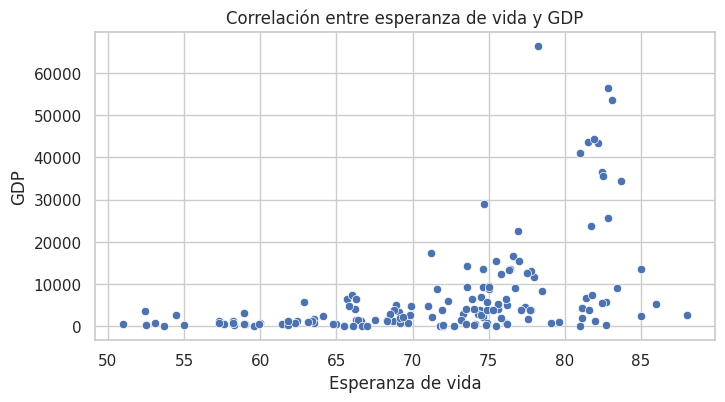

In [6]:
plt.figure(figsize = (8, 4))
sns.scatterplot(data = df_2015, x = 'Life expectancy ', y = 'GDP')
plt.title('Correlación entre esperanza de vida y GDP')
plt.xlabel('Esperanza de vida')
plt.ylabel('GDP')
plt.show()

Descubrimiento del gráfico "Correlación entre esperanza de vida y GDP": Mientras que el cálculo nos indica una correlación moderada (0,45), el gráfico nos revela que en la gran mayoría de países a pesar de tener un GDP más o menos similar, sus esperanzas de vida varían hasta 35 años, lo que dista un poco del resultado previo. ¿Es entonces el GDP un factor menos relevante respecto la esperanza de vida?

#### 3.- Impacto de la prevalencia de Hepatitis B sobre la esperanza de vida

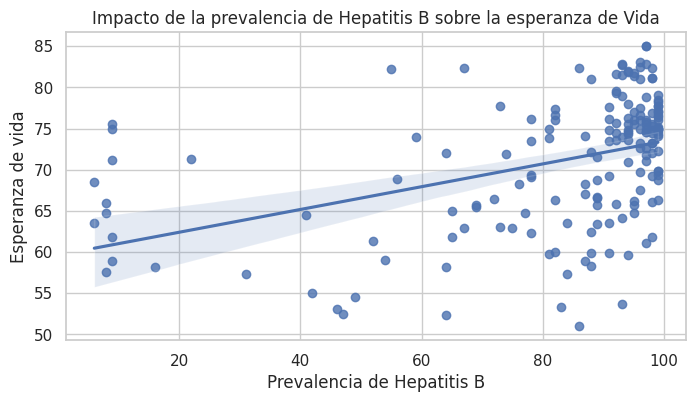

In [7]:
df_2015.loc[:, 'Hepatitis B'] = df_2015['Hepatitis B'].astype(float)
df_2015.loc[:, 'Life expectancy '] = df_2015['Life expectancy '].astype(float)

plt.figure(figsize = (8, 4))
sns.regplot(data = df_2015, x = 'Hepatitis B', y = 'Life expectancy ')
plt.title('Impacto de la prevalencia de Hepatitis B sobre la esperanza de Vida')
plt.xlabel('Prevalencia de Hepatitis B')
plt.ylabel('Esperanza de vida')
plt.show()

Descubrimiento del gráfico "Impacto de la prevalencia de Hepatitis B sobre la esperanza de Vida": A pesar de que el gráfico refleja una dispersión considerable, existe una gran concentración de países con mayor prevalencia de Hepatitis B y a su vez una esperanza de vida alta, demostrando que esta enfermedad tiene un buen ratio de prevención/tratamiento para muchos países y por lo tanto no necesariamente impacta significativamente en la esperanza de vida.

## Detección de datos nulos

In [8]:
null_values = df_by_country.isnull().sum()
null_values

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [9]:
print(df_by_country.dtypes)

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


## Práctica con dataframe de Afganistán

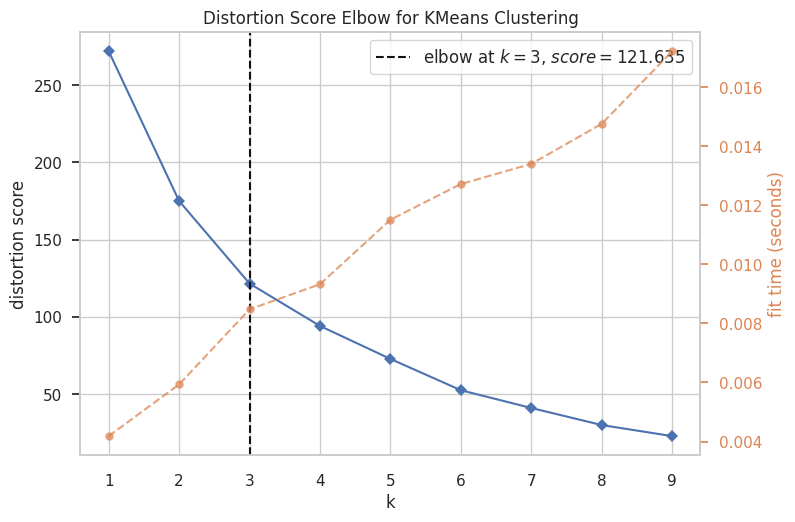

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:
# Instancia df nueva según país para la feature selection, eliminando columnas de menor relevancia para el ejercicio
df_afg = df[df['Country'] == 'Afghanistan']
X_afg = df_afg.drop(['Country', 'Year', 'Status', 'Life expectancy '], axis=1)

# Revisión de datos nulos se verificó en un paso anterior

# Estandarización de los datos
scaler = StandardScaler()
X_afg_scaled = scaler.fit_transform(X)
X_afg_scaled

# Método de codo para conseguir mi número de componentes
model = KMeans()
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X_afg_scaled)
visualizer.show()

In [80]:
# Creación y ajuste de modelo
final_afg_model = KMeans(n_clusters=3, max_iter=1000, init='random', n_init=10, random_state=42)
preds_afg = final_afg_model.fit_predict(X_afg_scaled)
preds_afg

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [81]:
np.ndim(preds_afg)

1

In [82]:
preds_afg=pd.DataFrame(preds_afg)
preds_afg

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,2
8,2
9,2


In [83]:
df_afg_contact=pd.concat([df_afg, preds_afg], axis=1)
df_afg_contact=df_afg_contact.rename(columns={0: "Cluster"})
df_afg_contact

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Cluster
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,0
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,0
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,2
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,2
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,2


In [85]:
df_afg_contact.groupby(["Cluster"])[["Life expectancy ", "GDP", "Year"]].describe()

Life expectancy                                                     \
                   count       mean       std   min     25%    50%     75%   
Cluster                                                                      
0                    7.0  60.128571  2.205836  58.6  59.000  59.50  59.900   
1                    2.0  55.050000  0.353553  54.8  54.925  55.05  55.175   
2                    7.0  57.157143  0.605137  56.2  56.850  57.30  57.400   

                GDP              ...                          Year          \
          max count        mean  ...         75%         max count    mean   
Cluster                          ...                                         
0        65.0   7.0  508.774167  ...  622.220745  669.959000   7.0  2012.0   
1        55.3   2.0  116.028490  ...  116.762735  117.496980   2.0  2000.5   
2        58.1   7.0  235.252951  ...  321.199783  373.361116   7.0  2005.0   

                                                             
              std     min      25%     50%      75%     max  
Cluster                                                      
0        2.160247  2009.0  2010.50  2012.0  2013.50  2015.0  
1        0.707107  2000.0  2000.25  2000.5  2000.75  2001.0  
2        2.160247  2002.0  2003.50  2005.0  2006.50  2008.0  

[3 rows x 24 columns]

## Práctica con dataframe mundial

In [48]:
# Instancia df final, eliminando columnas de menor relevancia para el ejercicio
df_final = df
X_final = df_final.drop(['Country', 'Status', 'Life expectancy '], axis=1)

# Revisión de datos nulos
null_values_final = X_final.isnull().sum()
null_values_final

,0
Year,0
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0
BMI,34
under-five deaths,0
Polio,19


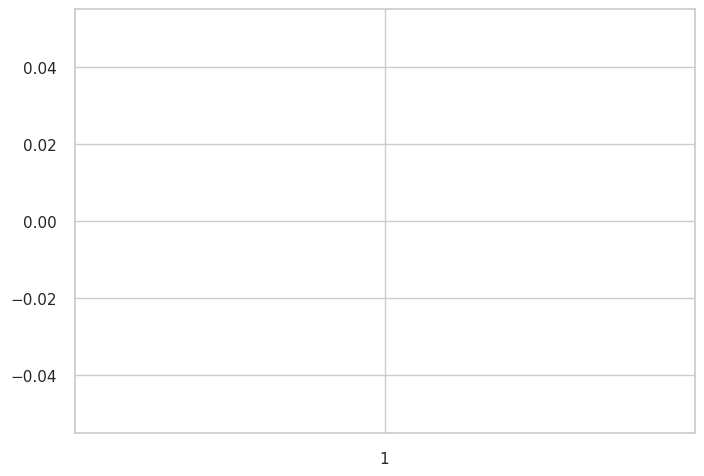

In [53]:
# Revisión de columnas para identificación de outliers
plt.boxplot(df['Schooling'])
plt.show()

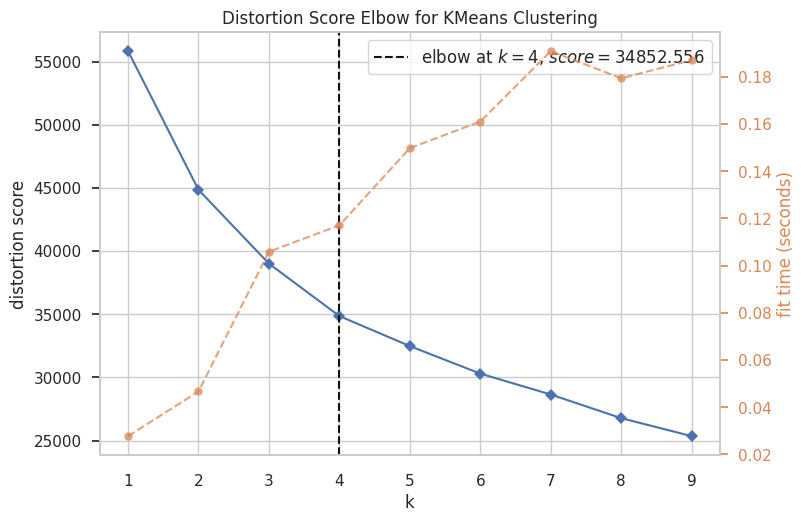

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
# Trata de datos nulos
media_columnas = X_final.mean()
X_imp = X_final.fillna(media_columnas)

# Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imp)
X_scaled

# Método de codo para conseguir mi número de componentes
model = KMeans()
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X_scaled)
visualizer.show()

In [61]:
# Creación y ajuste de modelo
final_model = KMeans(n_clusters=4, max_iter=1000, init='random', n_init=10, random_state=42)
preds = final_model.fit_predict(X_scaled)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [62]:
np.ndim(preds)

1

In [63]:
preds=pd.DataFrame(preds)
preds

,0
0,0
1,0
2,0
3,0
4,0
...,...
2933,0
2934,0
2935,0
2936,0


In [65]:
df_contact=pd.concat([df_final, preds], axis=1)
df_contact=df_contact.rename(columns={0: "Cluster"})
df_contact

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Cluster
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0


In [86]:
df_contact.groupby(["Cluster"])[["Life expectancy ", "GDP", "Year"]].describe()

Life expectancy                                                        \
                   count       mean       std   min     25%   50%   75%   max   
Cluster                                                                         
0                 1098.0  60.116485  7.916712  36.3  54.325  59.5  65.7  79.0   
1                 1573.0  73.931151  4.699585  52.8  71.700  73.9  76.5  89.0   
2                  237.0  80.803797  3.061548  73.6  78.900  81.0  82.1  89.0   
3                   20.0  61.925000  7.367702  47.1  62.800  64.6  66.5  68.3   

            GDP                ...                                Year  \
          count          mean  ...           75%           max   count   
Cluster                        ...                                       
0        1099.0   2208.574108  ...   2703.268681   22742.38159  1099.0   
1        1582.0   5657.699917  ...   7483.158469   43665.94700  1582.0   
2         237.0  44696.528179  ...  52157.468700  119172.74180   237.0   
3          20.0    736.909544  ...   1371.075000    1613.18878    20.0   

                                                                          
                mean       std     min      25%     50%      75%     max  
Cluster                                                                   
0        2006.855323  4.608537  2000.0  2003.00  2007.0  2011.00  2015.0  
1        2008.005689  4.610369  2000.0  2004.00  2008.0  2012.00  2015.0  
2        2007.434599  4.253730  2000.0  2004.00  2008.0  2011.00  2015.0  
3        2006.450000  4.828370  2000.0  2002.75  2005.5  2010.25  2015.0  

[4 rows x 24 columns]

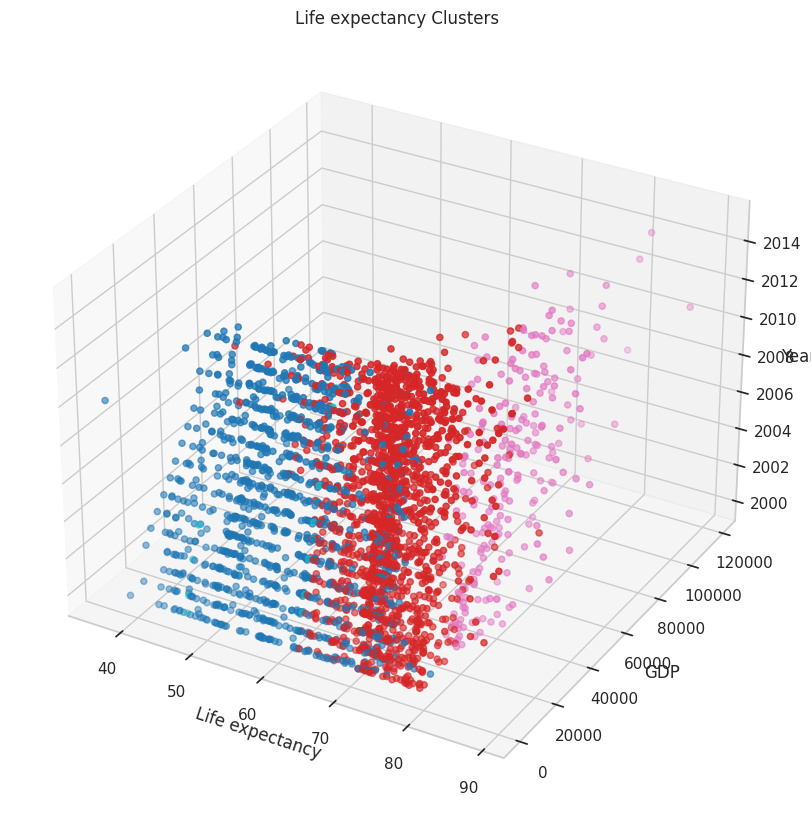

In [76]:
fig = plt.figure(figsize=(10,18))
ax = plt.axes(projection='3d')
ax.scatter3D(df_final["Life expectancy "], df_final ["GDP"], df_final["Year"], c=preds, cmap="tab10")
plt.title ("Life expectancy Clusters")
ax.set_xlabel("Life expectancy")
ax.set_ylabel("GDP")
ax.set_zlabel("Year")
plt.show()

## Conclusión

Afganistán ha tenido una proyección de esperanza de vida al alza que se ha mantenido durante los años de medición (2000-2025). Como vimos en el análisis previo, en los últimos años tuvo un incremento exponencial el cual eventualmente podría llegar a estar relacionado a la disminución del índice de la columna "Polio" dado su comportamiento inversamente proporcional.
</br>
En comparación con los índices mundiales, Afganistán tiene un GDP considerablemente menor a la media del componente (Cluster 3) con el cual se podría comparar según su esperanza de vida. Esto a pesar del hecho que el componente referenciado tiene la peor esperanza de vida promedio en los índices mundiales, nos permite inferir que a pesar de tener un GDP más bajo, Afganistán ha tenido un manejo correcto acorde según sus condiciones socioeconómicas.
</br>
A nivel mundial, los países en promedio con mejor esperanza de vida, suelen tener un GDP más alto respecto otros componentes, lo que nos indica una muy posible correlación entre estos factores.
</br>
La relación encontrada con la columna "Polio" nos puede dar pie para inferir que el plan de salud de Afganistán vio mejoras en los últimos años al cubrir enfermedades potencialmente letales.
Nos sería posible afirmar que la prevalencia de enfermedades prevenibles como el Polio afecta negativamente la esperanza de vida.